<a href="https://colab.research.google.com/github/Blockchain-Framework/bitcoin-anomaly-analysis/blob/develop/Notebooks/cnn/3d_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models, datasets, layers, Sequential
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, AveragePooling2D, LayerNormalization

### Splitting Data


In [3]:

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [4]:
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [5]:
# y_train.head()

In [64]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FYP/Anomaly/bitcoin_imbalance_train_set.csv')
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FYP/Anomaly/bitcoin_imbalance_test.csv")

In [65]:
# Split train dataset
X_train = train.drop(columns=['label'])  # Drop the 'label' column for features
y_train = train['label']  # Select the 'label' column for the target variable

# Split test dataset
X_test = test.drop(columns=['label'])  # Drop the 'label' column for features
y_test = test['label']  # Select the 'label' column for the target variable

In [66]:
# Convert multi-class to binary classification for the target variable
y_train = y_train.apply(lambda x: 1 if x > 0 else 0)
y_test = y_test.apply(lambda x: 1 if x > 0 else 0)


In [67]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

### Features Extraction

In [68]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

# forest = RandomForestClassifier()
# _ = forest.fit(X_train, y_train)
# print(forest.score(X_test, y_test))

In [69]:
# rfe = RFE(forest, n_features_to_select=20)

# # Define 5-fold cross-validation object
# cv = KFold(n_splits=5, shuffle=True, random_state=1)

# # Perform RFE with 5-fold cross-validation
# scores = cross_val_score(rfe, X_train, y_train, cv=cv)

# # Print mean score and standard deviation
# print('Accuracy: {:.3f} (+/- {:.3f})'.format(scores.mean(), scores.std()))

In [70]:
# pd.DataFrame(
#     zip(X_train.columns, abs(forest.feature_importances_)),
#     columns=["feature", "weight"],
# ).sort_values("weight").reset_index(drop=True)

In [71]:
# from sklearn.feature_selection import RFECV
# from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
# from sklearn.model_selection import cross_validate
# # Init, fit
# # scoring = ['accuracy', 'precision', 'recall', 'f1']
# rfecv = RFECV(
#     estimator=RandomForestClassifier(),
#     min_features_to_select=20,
#     n_jobs=-1,
#     step=10,
#     scoring='f1_macro',
#     cv=5
# )

In [72]:
# _ = rfecv.fit(X_train, y_train)

In [73]:
# print(X_train.columns[rfecv.get_support()])

In [74]:
# selected_features = X_train.columns[rfecv.get_support()]
# # selected_features=selected_features.tolist()

In [75]:
# selected_features

In [76]:
# n=20
# feature_importance = _.estimator_.feature_importances_  # or coef_
# feature_importance_sorted = sorted(enumerate(feature_importance), key=lambda x: x[1])
# top_n_idx = [idx for idx, _ in feature_importance_sorted[:n]]

# top_64_features = X_train.columns[top_n_idx]
# top_64_features = top_64_features.tolist()
# top_64_features

In [77]:
# features_removed=(set(X_train.columns)-set(top_64_features))
# features_removed

In [78]:
features_to_be_dropped=['input_output_max_ratio',
 'input_output_maximum_transaction_value_diff',
 'input_output_mean_ratio',
 'input_output_min_ratio',
 'input_output_minimum_transaction_value_diff',
 'input_output_percentile_25_diff',
 'input_output_percentile_75_diff',
 'input_output_time_diff_max_min_diff',
 'input_output_transaction_count_ratio',
 'input_output_usd_max_ratio',
 'input_output_usd_min_ratio',
 'input_output_usd_percentile_25_diff',
 'input_output_usd_percentile_75_diff',
 'input_range_mean_ratio',
 'input_spending_value_usd_25th_percentile',
 'input_spending_value_usd_75th_percentile',
 'input_spending_value_usd_maximum',
 'input_spending_value_usd_mean',
 'input_spending_value_usd_median',
 'input_spending_value_usd_minimum',
 'input_time_diff_25th_percentile',
 'input_time_diff_median',
 'input_time_diff_minimum',
 'input_time_diff_range',
 'input_value_25th_percentile',
 'input_value_75th_percentile',
 'input_value_maximum',
 'input_value_mean',
 'input_value_median',
 'input_value_minimum',
 'output_range_mean_ratio',
 'output_time_diff_75th_percentile',
 'output_time_diff_range',
 'output_value_maximum',
 'output_value_mean',
 'output_value_median',
 'output_value_minimum',
 'output_value_usd_25th_percentile',
 'output_value_usd_maximum',
 'output_value_usd_mean',
 'output_value_usd_median',
 'output_value_usd_minimum']

In [79]:
X_train=X_train.drop(features_to_be_dropped, axis=1)
X_test=X_test.drop(features_to_be_dropped, axis=1)
X_val=X_val.drop(features_to_be_dropped, axis=1)

## Model Training

### Multiclass Classification

In [80]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(54606, 20)
(17800, 20)
(18203, 20)


In [81]:
#This model was taking a lot of time to run so we had to stop the training
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LayerNormalization
# from keras.optimizers import Adam
# from keras.losses import SparseCategoricalCrossentropy
# from keras.layers import Conv3D, BatchNormalization, AveragePooling3D, SpatialDropout3D

from keras.models import Sequential
from keras.layers import Conv3D, BatchNormalization, AveragePooling3D, SpatialDropout3D, Flatten, Dense
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

cnn3d = Sequential()
cnn3d.add(Conv3D(filters=32, kernel_size=(2, 2, 3), activation='relu', padding='same', input_shape=(2, 2, 5, 1)))
cnn3d.add(BatchNormalization())
cnn3d.add(AveragePooling3D(pool_size=(1, 1, 2)))
cnn3d.add(SpatialDropout3D(0.05))

cnn3d.add(Conv3D(filters=64, kernel_size=(2, 2, 3), activation='relu', padding='same'))
cnn3d.add(BatchNormalization())
cnn3d.add(AveragePooling3D(pool_size=(1, 1, 2)))
cnn3d.add(SpatialDropout3D(0.05))

# Reducing the number of Conv3D layers due to limited data dimensionality
cnn3d.add(Flatten())
cnn3d.add(Dense(256, activation='relu'))
cnn3d.add(Dense(units=2, activation='softmax'))

cnn3d.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# X_train = np.reshape(X_train, (X_train.shape[0], 64))

In [82]:
X_train = X_train.values.reshape(X_train.shape[0], 2, 2, 5, 1)
X_val = X_val.values.reshape(X_val.shape[0], 2, 2, 5, 1)
X_test = X_test.values.reshape(X_test.shape[0], 2, 2, 5, 1)

In [83]:
from keras.callbacks import EarlyStopping
print(X_train.shape)
history = cnn3d.fit(X_train, y_train, epochs=25, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

(54606, 2, 2, 5, 1)
Epoch 1/25
1707/1707 [==============================] - 12s 6ms/step - loss: 0.6380 - accuracy: 0.6314 - val_loss: 0.6886 - val_accuracy: 0.5527
Epoch 2/25
1707/1707 [==============================] - 10s 6ms/step - loss: 0.6154 - accuracy: 0.6553 - val_loss: 0.7073 - val_accuracy: 0.5050
Epoch 3/25
1707/1707 [==============================] - 9s 5ms/step - loss: 0.6018 - accuracy: 0.6664 - val_loss: 0.6842 - val_accuracy: 0.5542
Epoch 4/25
1707/1707 [==============================] - 10s 6ms/step - loss: 0.5934 - accuracy: 0.6743 - val_loss: 0.6926 - val_accuracy: 0.5489
Epoch 5/25
1707/1707 [==============================] - 10s 6ms/step - loss: 0.5898 - accuracy: 0.6780 - val_loss: 0.7065 - val_accuracy: 0.4505
Epoch 6/25
1707/1707 [==============================] - 10s 6ms/step - loss: 0.5861 - accuracy: 0.6797 - val_loss: 0.6895 - val_accuracy: 0.5500
Epoch 7/25
1707/1707 [==============================] - 9s 5ms/step - loss: 0.5831 - accuracy: 0.6797 - val_los

In [84]:
cnn3d.save('/content/drive/MyDrive/Colab Notebooks/FYP/Anomaly/1d_CNN/CNN3D_binary.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


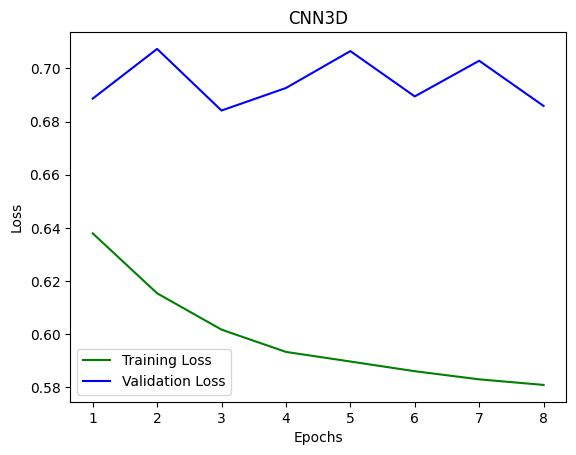

In [85]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 9)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN3D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

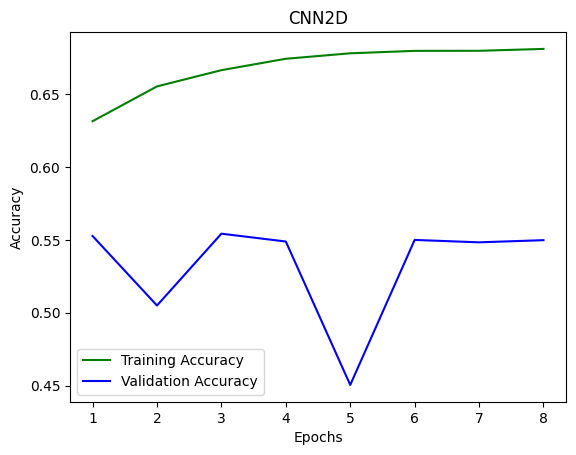

In [86]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 9)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [88]:

y_pred = cnn3d.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

557/557 [==============================] - 3s 5ms/step


In [89]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

In [90]:
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score-m: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='macro')*100))


Testing Accuracy: 94.52

Precision: 96.78
Recall: 94.52
F1-score: 95.62

F1-score-m: 50.93



In [91]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

[[16800   700]
 [  276    24]]
